## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [4]:
for col in data.columns:
  print(f"{col.rjust(19)}: {data[col].isna().sum()} empty values")

            Species: 0 empty values
             Island: 0 empty values
  Clutch Completion: 0 empty values
           Date Egg: 0 empty values
 Culmen Length (mm): 2 empty values
  Culmen Depth (mm): 2 empty values
Flipper Length (mm): 2 empty values
      Body Mass (g): 2 empty values
                Sex: 10 empty values
  Delta 15 N (o/oo): 14 empty values
  Delta 13 C (o/oo): 13 empty values


Пропущенные значения есть в столбцах `Culmen Length (mm)`, `Culmen Depth (mm)`, `Flipper Length (mm)`, `Body Mass (g)`, `Sex`, `Delta 15 N (o/oo)` и `Delta 13 C (o/oo)`. Оставим в датасете только строки без пропущенных значений.

In [5]:
data = data[
    data["Culmen Length (mm)"].notna() & data["Culmen Depth (mm)"].notna() & \
    data["Flipper Length (mm)"].notna() & data["Body Mass (g)"].notna() & \
    data["Sex"].notna() & data["Delta 15 N (o/oo)"].notna() & data["Delta 13 C (o/oo)"].notna()
]

In [6]:
for col in data.columns:
  print(f"{col.rjust(19)}: {data[col].isna().sum()} empty values; data type: {data[col].dtype}")

            Species: 0 empty values; data type: object
             Island: 0 empty values; data type: object
  Clutch Completion: 0 empty values; data type: object
           Date Egg: 0 empty values; data type: int64
 Culmen Length (mm): 0 empty values; data type: float64
  Culmen Depth (mm): 0 empty values; data type: float64
Flipper Length (mm): 0 empty values; data type: float64
      Body Mass (g): 0 empty values; data type: float64
                Sex: 0 empty values; data type: object
  Delta 15 N (o/oo): 0 empty values; data type: float64
  Delta 13 C (o/oo): 0 empty values; data type: float64


Закодируем столбец `Island` с помощью One-Hot-Encoding:

In [7]:
data["Island=Biscoe"] = data["Island"] == "Biscoe"
data["Island=Dream"] = data["Island"] == "Dream"
del data["Island"]

Закодируем столбец `Clutch Completion` с помощью One-Hot-Encoding:

In [8]:
data["Clutch Completion"] = data["Clutch Completion"] == "YES"

Удалим строку со значением `.` в столбце `Sex`:

In [9]:
data = data[data["Sex"] != "."]

Закодируем столбец `Sex` как бинарный признак:

In [10]:
data["Sex=MALE"] = data["Sex"] == "MALE"
del data["Sex"]

Закодируем столбец `Species` как целевой класс в ординальном порядке:

In [11]:
species = {
    "Chinstrap": 0,
    "Gentoo": 1,
    "Adelie": 2,
}

data["Species"] = data["Species"].apply(lambda s: species[s]).astype(np.int8)

Итого, в датасете больше нет пропусков, а все признаки имеют либо численный, либо логический тип:

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              324 non-null    int8   
 1   Clutch Completion    324 non-null    bool   
 2   Date Egg             324 non-null    int64  
 3   Culmen Length (mm)   324 non-null    float64
 4   Culmen Depth (mm)    324 non-null    float64
 5   Flipper Length (mm)  324 non-null    float64
 6   Body Mass (g)        324 non-null    float64
 7   Delta 15 N (o/oo)    324 non-null    float64
 8   Delta 13 C (o/oo)    324 non-null    float64
 9   Island=Biscoe        324 non-null    bool   
 10  Island=Dream         324 non-null    bool   
 11  Sex=MALE             324 non-null    bool   
dtypes: bool(4), float64(6), int64(1), int8(1)
memory usage: 21.8 KB


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [13]:
x, y = data[data.columns[1:]], data["Species"]

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [14]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    stratify=y, test_size=0.3,
    random_state=np.random.get_state()[1][0],
)

Аргумент `stratify` функции `train_test_split` позволяет сохранить пропорции между целевыми классами в тренировочной и тестовой выборках.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [15]:
X_train_small, X_test_small = (
    X_train[["Flipper Length (mm)", "Body Mass (g)"]],
    X_test[["Flipper Length (mm)", "Body Mass (g)"]],
)

In [16]:
scaler = StandardScaler()
X_train_small = scaler.fit_transform(X_train_small)
X_test_small = scaler.transform(X_test_small)

In [17]:
knn = {
    k: KNeighborsClassifier(
        n_neighbors=k,
        weights='distance',
        n_jobs=-1,
    ).fit(
        X_train_small,
        y_train,
    )

    for k in (1, 3, 5, 10, 15, 25, )
}

results = {
    k: (
        knn[k].score(X_train_small, y_train),
        knn[k].score(X_test_small, y_test),
    )

    for k in knn.keys()
}

print("NN\tTrain\tTest")
for k, (train_acc, test_acc) in results.items():
    print(f"{k}\t{train_acc:.2f}\t{test_acc:.2f}")

NN	Train	Test
1	0.97	0.77
3	0.97	0.77
5	0.97	0.76
10	0.97	0.77
15	0.97	0.80
25	0.97	0.81


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [18]:
#!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [19]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

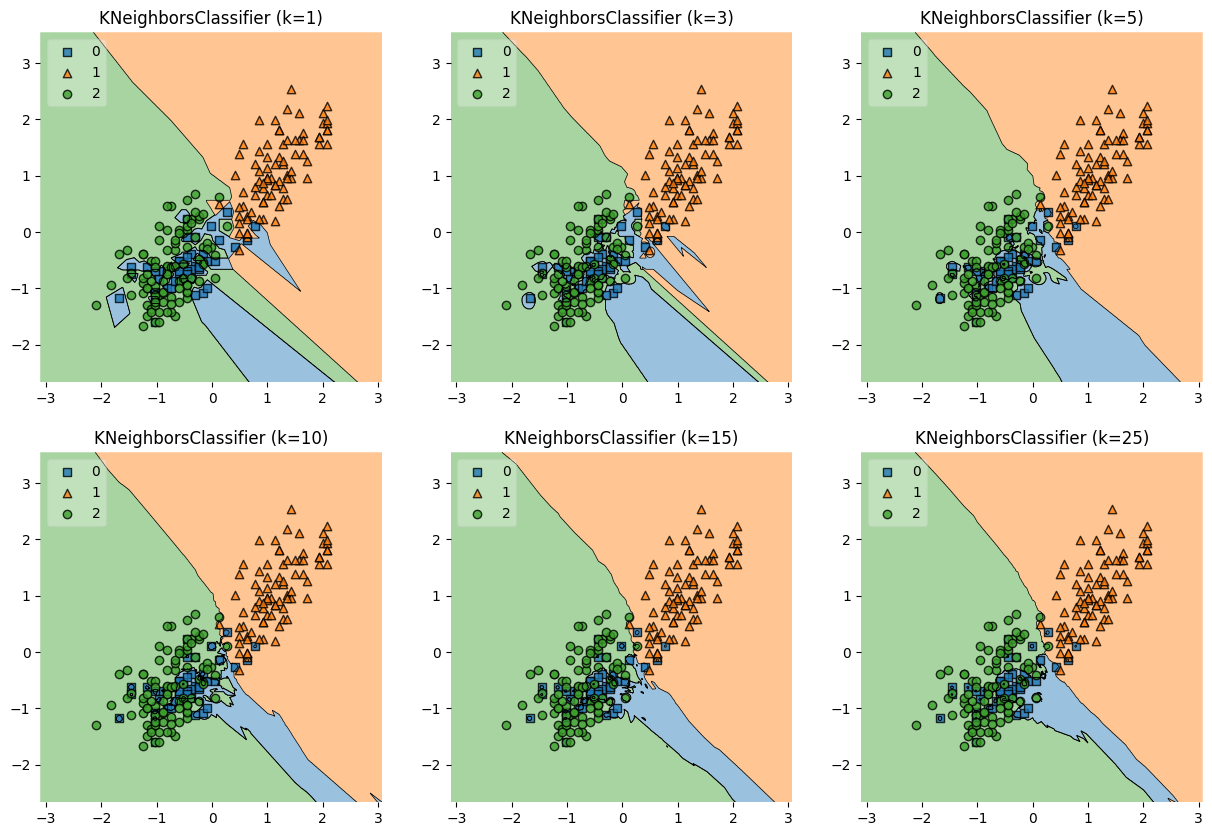

In [20]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(15, 10))

labels = [f"KNeighborsClassifier (k={k})" for k in knn.keys()]
for knn_, lab, grd in zip(knn.values(),
                         labels,
                         itertools.product([0, 1], [0, 1, 2])):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_small, y=np.asarray(y_train), clf=knn_, legend=2, n_jobs=-1)
    plt.title(lab)

plt.show();

P.S. Источник кода $-$ [официальная документация](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки `mlxtend`, раздел `Example 3 - Decision Region Grids`.

В код внесены изменения для увеличения количества графиков с $4$ до $6$, а также разные модели из примера заменены на описанные выше `KNeighborsClassifier`.

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

По графикам видно, что $k = 1$ и $k = 3$ приводят к образованию мелких "рваных" участков границы решающей поверхности, в том числе с образованием "островов", явно не характерных для реального решения задачи.

При бОльших $k$ граница становится более плавной и обоснованной, хотя всё равно присутствуют маленькие "островки" вокруг каких-то объектов.

**Вывод:** для обучения классификатора следует выбирать $k$ не меньше $5$, иначе будет проявляться переобучение модели: слишком сильно учитываются особенности каждого отдельного объекта из обучающей выборки, что не способствует высокой accuracy на тестовой выборке.

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

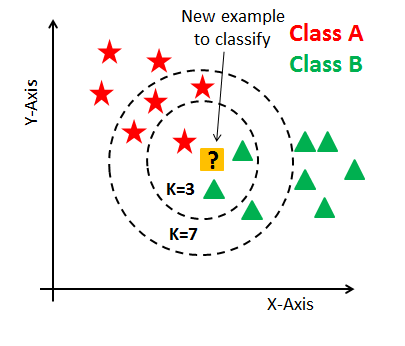

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [21]:
from collections import Counter

class KNN:
    def __init__(self, k: int) -> None:
        if not isinstance(k, int) or k <= 0:
            raise ValueError("`k` parameter must be a positive integer")

        self.k = k
        self.__X = None
        self.__y = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self.__X = np.array(X)
        self.__y = np.array(y)

        assert len(self.__X.shape) == 2 and len(self.__y.shape) == 1, "Wrong shape of training data"

        if self.__X.shape[0] != self.__y.shape[0]:
            raise ValueError("Number of samples in `X` and `y` must be equal")


    def count_distance(self, x: np.ndarray, y: np.ndarray) -> np.floating:
        """Calculates the euclidean distance between two vectors"""

        x = np.array(x)
        y = np.array(y)

        assert len(x.shape) == len(y.shape) == 1 and x.shape[0] == y.shape[0], "Cannot calculate distance between vectors of different sizes"

        return np.linalg.norm(x - y, ord=2, axis=None)

    def predict(self, X: np.ndarray) -> np.ndarray:
        assert self.__X is not None and self.__y is not None, "Fit the model first"

        X = np.array(X)

        assert len(X.shape) == 2 and X.shape[1] == self.__X.shape[1], f"Wrong number of features in `X`: {self.__X.shape[1]} features are expected, but {X.shape[1]} are given"

        distances = np.apply_along_axis(
            func1d=lambda x: np.apply_along_axis(
                func1d=self.count_distance,
                axis=1,
                arr=self.__X, # type: ignore
                y=x,
            ),
            axis=1,
            arr=X,
        ) # Небольшой `костыль` во избежание явных циклов for,
        # на который ещё и ругается Pylance :)

        k_nearest = self.__y[np.argsort(distances, axis=1)[:, :self.k]]

        return np.apply_along_axis(lambda x: Counter(x).most_common(1)[0][0], axis=1, arr=k_nearest)

In [22]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [23]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [24]:
best_k, best_accuracy = None, 0

for k in range(1, 31):
    knn = KNN(k)

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = (y_pred == y_test).mean()

    if accuracy > best_accuracy:
        best_k, best_accuracy = k, accuracy

print(f"Best k: {best_k}, accuracy on test: {best_accuracy:.4f}")

Best k: 8, accuracy on test: 0.7755


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [25]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [26]:
for col in data.columns:
  print(f"{col.rjust(10)}: {data[col].isna().sum()} empty values")

Unnamed: 0: 0 empty values
     carat: 0 empty values
       cut: 0 empty values
     color: 0 empty values
   clarity: 0 empty values
     depth: 0 empty values
     table: 0 empty values
     price: 0 empty values
         x: 0 empty values
         y: 0 empty values
         z: 0 empty values


_Неожиданно в датасете не оказалось пропущенных значений ни в одном столбце_

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Всего $3$ столбца имеют нечисловой тип данных $-$ категориальные признаки

In [28]:
for col in data.columns:
    if data[col].dtype != 'float64':
        print(col, data[col].describe())
        print("--------------------------------")

Unnamed: 0 count    53940.000000
mean     26970.500000
std      15571.281097
min          1.000000
25%      13485.750000
50%      26970.500000
75%      40455.250000
max      53940.000000
Name: Unnamed: 0, dtype: float64
--------------------------------
cut count     53940
unique        5
top       Ideal
freq      21551
Name: cut, dtype: object
--------------------------------
color count     53940
unique        7
top           G
freq      11292
Name: color, dtype: object
--------------------------------
clarity count     53940
unique        8
top         SI1
freq      13065
Name: clarity, dtype: object
--------------------------------
price count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64
--------------------------------


Первый столбец `Unnamed: 0`, видимо, содержит просто порядковый номер записи, поэтому удалим его как бессмысленный для предсказания цены бриллианта.

In [29]:
data = data.drop(['Unnamed: 0'], axis=1)

**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

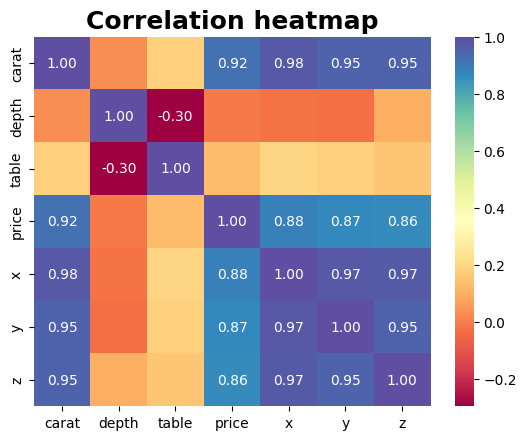

In [30]:
ax = sns.heatmap(data.corr(numeric_only=True), cmap="Spectral", annot=True, fmt="0.2f")
ax.set_title("Correlation heatmap", fontweight="bold", fontsize=18)

for cell in ax.texts:
    text = cell.get_text()
    if np.abs(float(text)) < 0.3:
        text = ""
    cell.set_text(text)

С ценой бриллианта напрямую коррелируют его измерения (по осям $x$, $y$ и $z$), а также вес (признак `carat`).

Что интересно, эти признаки ещё и имеют высокую корреляцию между собой, что логично $-$ чем больше бриллиант по размеру, тем больше его масса.

**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [31]:
cut_data = pd.get_dummies(data['cut'], prefix='cut', prefix_sep='=', dtype=np.int8)
color_data = pd.get_dummies(data['color'], prefix='color', prefix_sep='=', dtype=np.int8)
clarity_data = pd.get_dummies(data['clarity'], prefix='clarity', prefix_sep='=', dtype=np.int8)

data = pd.concat([data, cut_data, color_data, clarity_data], axis=1).drop(columns=['cut', 'color', 'clarity'])

**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [32]:
X, y = data.drop(['price'], axis=1), data['price']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=np.random.get_state()[1][0], # используем всё тот же random_state
)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [34]:
X_train.sample(n=5)

,carat,depth,table,x,y,z,cut=Fair,cut=Good,cut=Ideal,cut=Premium,...,color=I,color=J,clarity=I1,clarity=IF,clarity=SI1,clarity=SI2,clarity=VS1,clarity=VS2,clarity=VVS1,clarity=VVS2
31959,0.31,61.6,55.0,4.38,4.42,2.71,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
16555,1.01,57.7,63.0,6.55,6.65,3.81,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
24052,0.31,60.9,57.0,4.39,4.44,2.69,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1504,0.75,61.1,57.0,5.83,5.86,3.57,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
46098,0.50,61.9,58.0,5.06,5.09,3.14,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
X_train.describe()

,carat,depth,table,x,y,z,cut=Fair,cut=Good,cut=Ideal,cut=Premium,...,color=I,color=J,clarity=I1,clarity=IF,clarity=SI1,clarity=SI2,clarity=VS1,clarity=VS2,clarity=VVS1,clarity=VVS2
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,...,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000
mean,0.799763,61.744923,57.461129,5.735377,5.738825,3.541152,0.029742,0.090206,0.398962,0.255548,...,0.099979,0.052121,0.013587,0.033053,0.244107,0.169156,0.151571,0.227369,0.068065,0.093093
std,0.475556,1.428630,2.226637,1.122262,1.146605,0.711444,0.169877,0.286481,0.489691,0.436175,...,0.299976,0.222275,0.115768,0.178776,0.429562,0.374895,0.358609,0.419138,0.251861,0.290566
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.720000,4.730000,2.910000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Поскольку из $26$ столбцов только первые $6$ $-$ числовые, а остальные $-$ просто индикаторы категориальных признаков, то стандартизировать (масштабировать) будем только первые $6$ столбцов.

In [36]:
scaler = StandardScaler()

scaler.fit(X_train[X_train.columns[:6]])

X_train[X_train.columns[:6]] = scaler.transform(X_train[X_train.columns[:6]])
X_test[X_test.columns[:6]] = scaler.transform(X_test[X_test.columns[:6]])

In [37]:
X_train.describe()

,carat,depth,table,x,y,z,cut=Fair,cut=Good,cut=Ideal,cut=Premium,...,color=I,color=J,clarity=I1,clarity=IF,clarity=SI1,clarity=SI2,clarity=VS1,clarity=VS2,clarity=VVS1,clarity=VVS2
count,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,37758.000000,37758.000000,37758.000000,37758.000000,...,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000
mean,3.199117e-17,3.246351e-15,-2.587145e-15,3.319554e-16,4.215307e-16,3.746731e-16,0.029742,0.090206,0.398962,0.255548,...,0.099979,0.052121,0.013587,0.033053,0.244107,0.169156,0.151571,0.227369,0.068065,0.093093
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,0.169877,0.286481,0.489691,0.436175,...,0.299976,0.222275,0.115768,0.178776,0.429562,0.374895,0.358609,0.419138,0.251861,0.290566
min,-1.261200e+00,-1.312108e+01,-6.494692e+00,-5.110617e+00,-5.005124e+00,-4.977483e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.406338e-01,-5.214315e-01,-6.562130e-01,-9.047710e-01,-8.798482e-01,-8.871542e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.097846e-01,3.855287e-02,-2.070993e-01,-3.152324e-02,-2.513989e-02,-1.567511e-02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.051778e-01,5.285392e-01,6.911282e-01,7.169748e-01,6.987457e-01,7.011867e-01,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.853416e+00,1.207822e+01,1.685922e+01,4.459465e+00,4.636459e+01,3.972096e+01,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Теперь по абсолютным значениям коэффициентов в линейной модели можно будет судить о важности каждого из первых $6$ признаков.

Коэффициенты же при остальных $20$ признаках будут показывать, сколько $ добавляет к цене бриллианта его принадлежность к той или иной категории (например, качество огранки `Premium`).

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [38]:
linear_model = LinearRegression(n_jobs=-1)

linear_model.fit(X_train, y_train)
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

print(f"MSE on train: {np.mean(np.square(y_train - y_pred_train)):.4f}")
print(f"MSE on test: {np.mean(np.square(y_test - y_pred_test)):.4f}")

MSE on train: 1290541.9147
MSE on test: 1244765.4357


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [39]:
coeffs = linear_model.coef_

pd.Series(
    {
        X.columns[i]: coeffs[i]
        for i in range(len(X.columns))
    }
)

carat            5338.615671
depth             -90.173817
table             -60.332280
x               -1100.418850
y                  -6.458917
z                 -34.258945
cut=Fair         -592.557732
cut=Good            2.963348
cut=Ideal         253.638525
cut=Premium       185.212231
cut=Very Good     150.743628
color=D           835.314553
color=E           618.285586
color=F           562.010577
color=G           335.154315
color=H          -163.320116
color=I          -640.769680
color=J         -1546.675235
clarity=I1      -3889.609765
clarity=IF       1569.427535
clarity=SI1      -137.900094
clarity=SI2     -1107.669217
clarity=VS1       768.224542
clarity=VS2       447.115818
clarity=VVS1     1211.725416
clarity=VVS2     1138.685765
dtype: float64

Как видно из коэффициентов линейной модели, сильнее всего на цену бриллианта влияет его вес (как неожиданно!).

Также коэффициент при `x` на порядки больше по модулю чем у `y` и `z`, что, вероятно, связано с тем, что в первое измерение просто всегда записывали наибольшее значение геометричеких размеров бриллианта.

Признаки `depth` и `table` оказались сильно менее важными, чем `carat`: коэффициент при массе почти в $100$ раз больше по модулю, чем при `table`.

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [40]:
lasso = Lasso(alpha=10)

lasso.fit(X_train, y_train)

coeffs = lasso.coef_

pd.Series(
    {
        X.columns[i]: coeffs[i]
        for i in range(len(X.columns))
    }
)

carat            4853.407399
depth            -100.465142
table             -80.372165
x                -696.794327
y                  -0.000000
z                 -32.599937
cut=Fair         -443.367031
cut=Good          -32.472340
cut=Ideal          83.506570
cut=Premium         0.000000
cut=Very Good       0.000000
color=D           350.361780
color=E           176.452657
color=F           131.487166
color=G             0.000000
color=H          -433.428710
color=I          -846.577963
color=J         -1649.844484
clarity=I1      -3635.745900
clarity=IF        725.386305
clarity=SI1      -617.768774
clarity=SI2     -1525.264690
clarity=VS1       160.056750
clarity=VS2       -24.573215
clarity=VVS1      538.334305
clarity=VVS2      512.220009
dtype: float64

In [41]:
ridge = Ridge(alpha=10)

ridge.fit(X_train, y_train)

coeffs = ridge.coef_

pd.Series(
    {
        X.columns[i]: coeffs[i]
        for i in range(len(X.columns))
    }
)

carat            5298.926724
depth             -88.822846
table             -60.804550
x               -1058.745121
y                  -9.051731
z                 -37.405248
cut=Fair         -594.943225
cut=Good            3.008649
cut=Ideal         254.502004
cut=Premium       185.250613
cut=Very Good     152.181959
color=D           830.398469
color=E           614.575881
color=F           558.387548
color=G           333.496909
color=H          -163.364514
color=I          -637.518249
color=J         -1535.976045
clarity=I1      -3815.493748
clarity=IF       1549.243032
clarity=SI1      -146.088154
clarity=SI2     -1111.447632
clarity=VS1       757.957050
clarity=VS2       438.420152
clarity=VVS1     1199.643561
clarity=VVS2     1127.765738
dtype: float64

In [42]:
pd.Series(
    {
        X.columns[i]: np.abs(linear_model.coef_[i]) - np.abs(lasso.coef_[i])
        for i in range(len(X.columns))
    }
)

carat            485.208272
depth            -10.291325
table            -20.039885
x                403.624523
y                  6.458917
z                  1.659008
cut=Fair         149.190701
cut=Good         -29.508992
cut=Ideal        170.131955
cut=Premium      185.212231
cut=Very Good    150.743628
color=D          484.952774
color=E          441.832929
color=F          430.523411
color=G          335.154315
color=H         -270.108594
color=I         -205.808283
color=J         -103.169248
clarity=I1       253.863865
clarity=IF       844.041230
clarity=SI1     -479.868681
clarity=SI2     -417.595473
clarity=VS1      608.167792
clarity=VS2      422.542603
clarity=VVS1     673.391111
clarity=VVS2     626.465756
dtype: float64

In [43]:
pd.Series(
    {
        X.columns[i]: np.abs(linear_model.coef_[i]) - np.abs(ridge.coef_[i])
        for i in range(len(X.columns))
    }
)

carat            39.688946
depth             1.350971
table            -0.472270
x                41.673729
y                -2.592814
z                -3.146303
cut=Fair         -2.385493
cut=Good         -0.045301
cut=Ideal        -0.863478
cut=Premium      -0.038383
cut=Very Good    -1.438331
color=D           4.916084
color=E           3.709704
color=F           3.623029
color=G           1.657406
color=H          -0.044398
color=I           3.251432
color=J          10.699191
clarity=I1       74.116017
clarity=IF       20.184502
clarity=SI1      -8.188060
clarity=SI2      -3.778415
clarity=VS1      10.267492
clarity=VS2       8.695666
clarity=VVS1     12.081855
clarity=VVS2     10.920028
dtype: float64

Коэффициент при `carat` немного уменьшился при применении L1-регуляризации, но в целом значения коэффициентов всё ещё отличаются по модулю на ~$2$ порядка. При L2-регуляризации как будто вообще практически ничего не изменилось относительно простой линейной модели.

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [44]:
alphas = (0.1, 1, 10, 100, 200, )

In [45]:
norms_lasso = [
    np.linalg.norm(Lasso(alpha=alpha).fit(X_train, y_train).coef_)
    for alpha in alphas
]

In [46]:
norms_ridge = [
    np.linalg.norm(Ridge(alpha=alpha).fit(X_train, y_train).coef_)
    for alpha in alphas
]

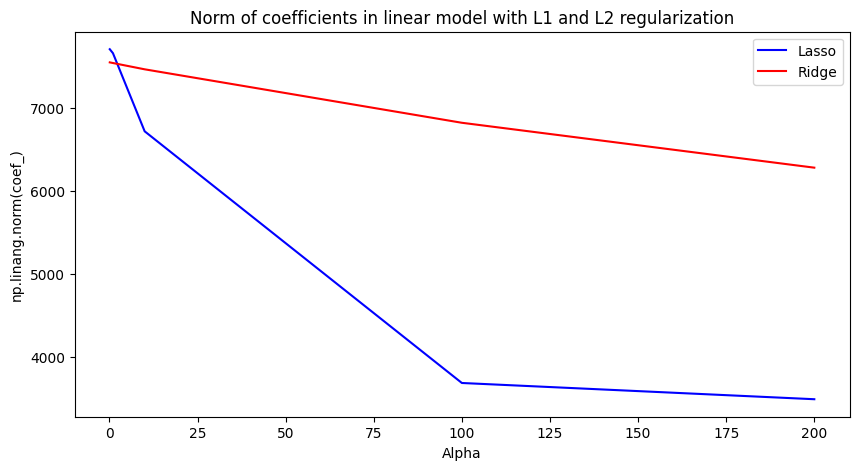

In [47]:
plt.figure(figsize=(10, 5))

plt.plot(alphas, norms_lasso, 'b', label='Lasso')
plt.plot(alphas, norms_ridge, 'r', label='Ridge')

plt.legend()
plt.title('Norm of coefficients in linear model with L1 and L2 regularization')
plt.xlabel('Alpha')
plt.ylabel('np.linang.norm(coef_)')

plt.show();

Собственно, график подтверждает: L1-регуляризация (`Lasso`) снижает норму коэффициентов линейной модели сильнее, чем L2-регуляризация (`Ridge`).

Поэтому `Lasso` используется для отбора признаков: если в обученной с L1-регуляризацией модели коэффициент при признаке околонулевой, можно целиком исключить его из регрессии, поскольку на итоговое предсказываемое значение он практически не влияет.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [48]:
lasso_cv = LassoCV(cv=5, alphas=alphas, n_jobs=-1)

lasso_cv.fit(X_train, y_train)

mse_path = pd.DataFrame(lasso_cv.mse_path_, index=lasso_cv.alphas_)

mse_path

,0,1,2,3,4
200.0,2.534744e+06,2.481568e+06,2.460482e+06,2.383135e+06,2.412551e+06
100.0,2.333106e+06,2.275034e+06,2.272061e+06,2.182157e+06,2.207552e+06
10.0,1.378714e+06,1.339116e+06,1.360617e+06,1.285215e+06,1.289408e+06
1.0,1.334932e+06,1.294433e+06,1.335458e+06,1.258209e+06,1.246602e+06
0.1,1.333887e+06,1.293215e+06,1.346878e+06,1.258849e+06,1.245324e+06


In [49]:
mean_mse = mse_path.agg("mean", axis=1).sort_index()

mean_mse

0.1      1.295630e+06
1.0      1.293927e+06
10.0     1.330614e+06
100.0    2.253982e+06
200.0    2.454496e+06
dtype: float64

In [50]:
print(f"The least mean MSE={mean_mse.min():.3f} is achieved with alpha={mean_mse.index[mean_mse.argmin()]:.1f}")

The least mean MSE=1293926.675 is achieved with alpha=1.0


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [51]:
final_model = Lasso(alpha=1.0).fit(X_train, y_train)

coeffs = final_model.coef_

pd.Series(
    {
        X.columns[i]: coeffs[i]
        for i in range(len(X.columns))
    }
)

carat            5290.023058
depth             -91.212070
table             -62.200590
x               -1061.663033
y                  -3.485158
z                 -34.622011
cut=Fair         -714.616558
cut=Good         -137.728050
cut=Ideal          99.642244
cut=Premium        28.204148
cut=Very Good       0.000000
color=D           485.581175
color=E           272.765059
color=F           217.597703
color=G             0.000000
color=H          -491.670590
color=I          -962.758336
color=J         -1858.437047
clarity=I1      -4357.890153
clarity=IF        991.165423
clarity=SI1      -679.818400
clarity=SI2     -1643.294506
clarity=VS1       213.563392
clarity=VS2       -93.887882
clarity=VVS1      650.461728
clarity=VVS2      582.067174
dtype: float64

После обучения модели с `Lasso(alpha=1.0)` коэффициент при `cut=Very Good` стал равным нулю, то есть огранка типа `Very Good` вообще не влияет на цену бриллианта. То же самое с цветом `G`.

Совсем небольшой по модулю коэффициент у вещественного признака `y`, значит, второе измерение бриллианта практически не влияет на цену бриллианта.

При этом коэффициент при `carat` по-прежнему самый большой по модулю среди всех признаков, то есть в действительности цена бриллианта определяется в основном его массой (как и в реальности). Ещё сильно влияет измерение `x`, видимо потому что это часто наибольшее по величине измерение размера бриллианта.

_Хотя, судя по датасету, чаще всего наибольший размер бриллианта находится в измерении `y`:_

In [52]:
print(
    f"X=max(X, Y, Z) in {((data["x"] > data["y"]) & (data["x"] > data["z"])).mean() * 100:.3f}% of diamonds,\n"
    f"Y=max(X, Y, Z) in {((data["y"] > data["x"]) & (data["y"] > data["z"])).mean() * 100:.3f}% of diamonds,\n"
    f"Z=max(X, Y, Z) in {((data["z"] > data["x"]) & (data["z"] > data["y"])).mean() * 100:.3f}% of diamonds"
)

X=max(X, Y, Z) in 43.424% of diamonds,
Y=max(X, Y, Z) in 56.541% of diamonds,
Z=max(X, Y, Z) in 0.004% of diamonds


**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [53]:
mse_plain_linear = np.mean(np.square(y_test - linear_model.predict(X_test)))
mse_lasso = np.mean(np.square(y_test - final_model.predict(X_test)))

print(f'Plain linear model MSE on Test: {mse_plain_linear:.3f}')
print(f'Lasso model MSE on Test: {mse_lasso:.3f}')

Plain linear model MSE on Test: 1244765.436
Lasso model MSE on Test: 1244173.005


In [54]:
mse_plain_linear - mse_lasso

np.float64(592.4311512578279)

Судя по MSE на тестовой выборке, лучше использовать для предсказаний модель `Lasso(alpha=1.0)`, так как на обычной линейной регрессии средний квадрат ошибки выше.

Скорее всего, это связано с уменьшением влияния выбросов на регрессию при добавлении в модель L1-регуляризации.